In [1]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [9]:
# %load ./utils/samples.py
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined = np.vstack((X_train, X_test))
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [10]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [11]:
from utils.plot_decision_regions import plot_decision_regions

d:\Code\Python\Python_Machine_Learning_Code\utils\plot_decision_regions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


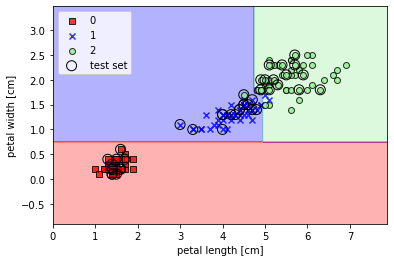

In [12]:
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [17]:
# 利用pydotplus和Graphviz绘制决策树图像

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# out_file=None，可以直接把数据赋予dot_data变量，而不产生中间文件tree.dot
# filled，rounded，class_names和feature_names为可选项
# 图像的视觉效果要添加颜色、框的边缘圆角，并在每个节点上显示绝大多数分类标签，以及分类标准的特征
dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=['petal length', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('./img/tree.png')

True